Name - Ali Asgar Chandanwala
Register No-21BLC1666


In [297]:
 import pandas as pd
 import numpy as np
 import seaborn as sns

In [298]:
data=pd.read_csv("/content/penguins_size.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Dealing with Missing values

In [299]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [300]:
data.culmen_length_mm.isnull()

0      False
1      False
2      False
3       True
4      False
       ...  
339     True
340    False
341    False
342    False
343    False
Name: culmen_length_mm, Length: 344, dtype: bool

In [301]:
data['culmen_length_mm'] = data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean())

In [302]:
data['culmen_depth_mm'] = data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].mean())

In [303]:
data['body_mass_g'] = data['body_mass_g'].fillna(data['body_mass_g'].mean())

In [304]:
data['sex'] = data['sex'].fillna(data['sex'].mode())

In [305]:
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean())

In [306]:
data['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [307]:
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [308]:
data=data.replace(to_replace=".",
		value="MALE")


In [309]:
data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [310]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Visulaization

In [311]:
### univariant analyisis

<ipython-input-312-60301c79d027>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

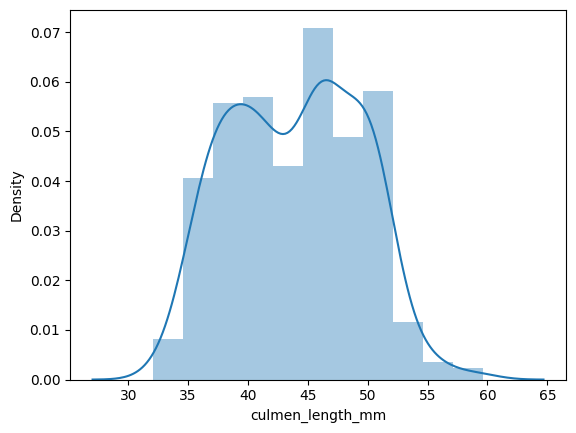

In [312]:
import matplotlib.pyplot as plt
sns.distplot(data.culmen_length_mm)

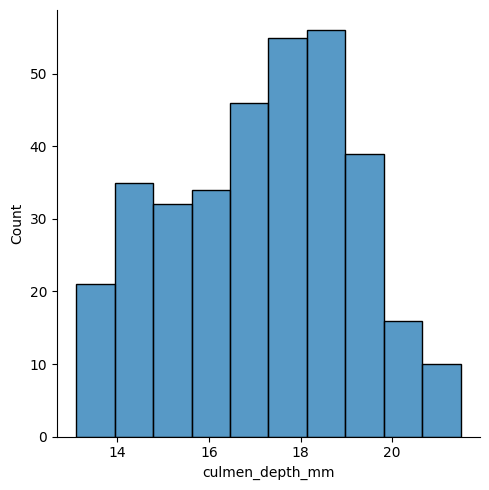

In [313]:
sns.displot(data.culmen_depth_mm)

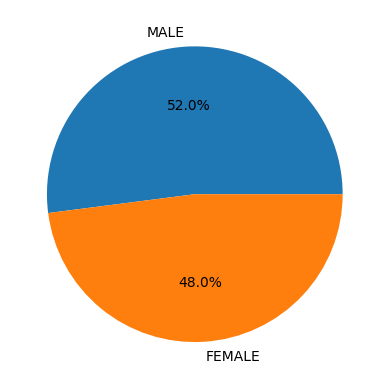

In [314]:
x=data["sex"].value_counts()
plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

Bivariant Analysis

<Axes: xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

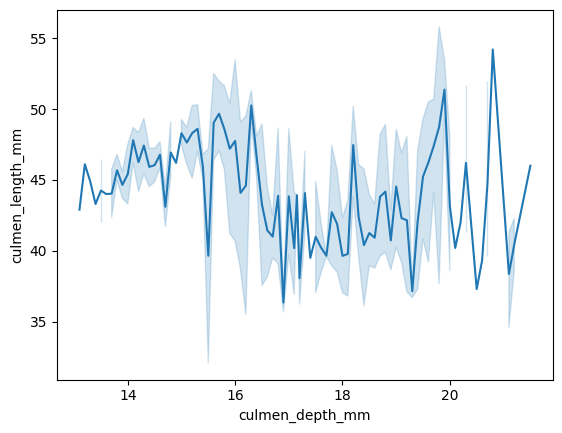

In [315]:
sns.lineplot(x=data.culmen_depth_mm,y=data.culmen_length_mm)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

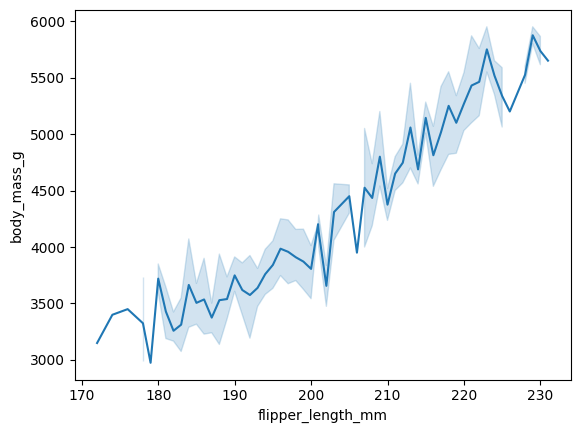

In [316]:
sns.lineplot(x=data.flipper_length_mm,y=data.body_mass_g)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

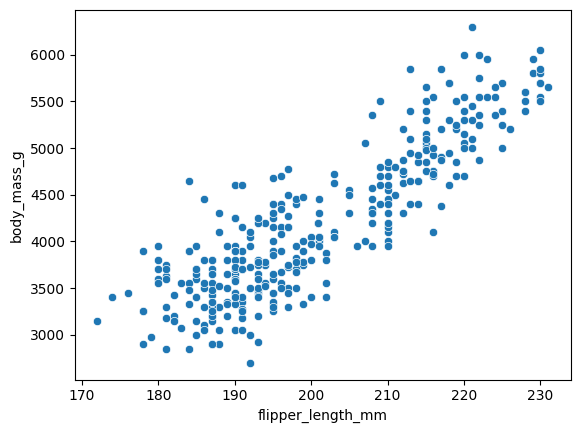

In [317]:
sns.scatterplot(x=data.flipper_length_mm,y=data.body_mass_g)

. Multivariate Analysis

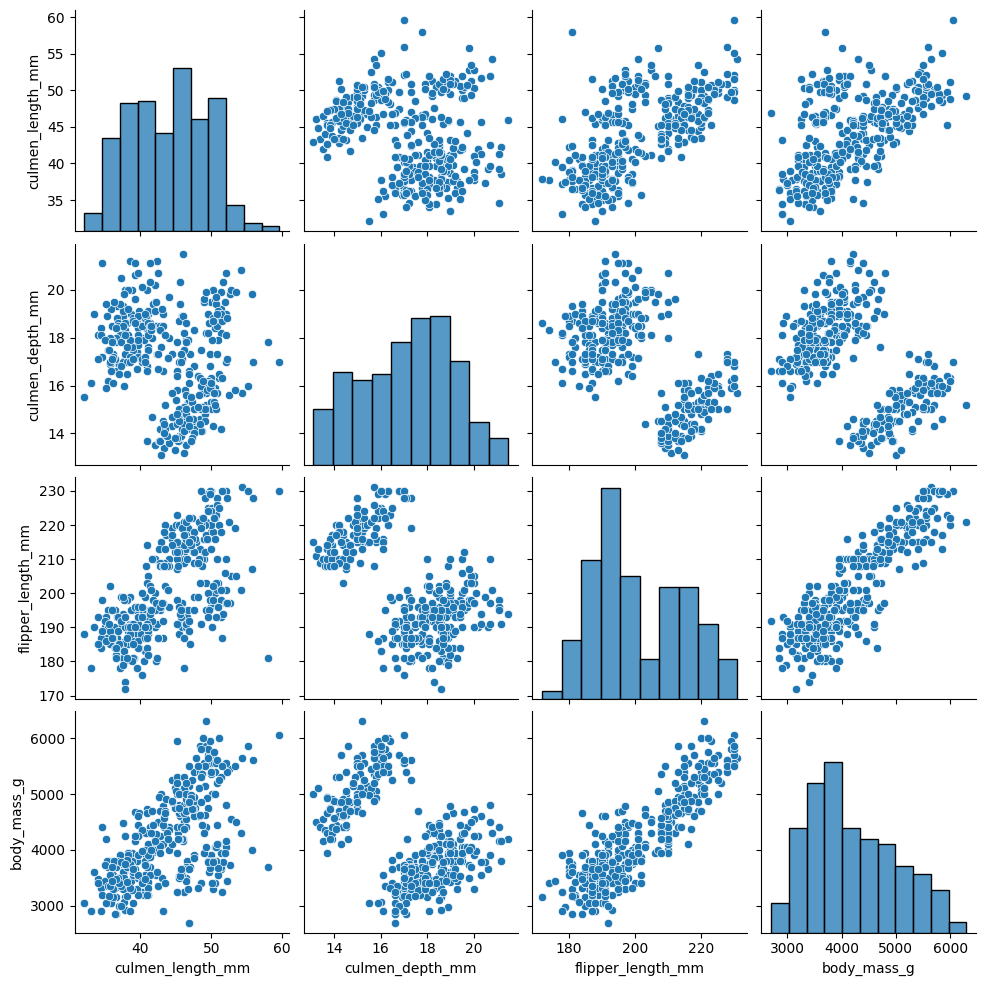

In [318]:
sns.pairplot(data)

<ipython-input-319-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

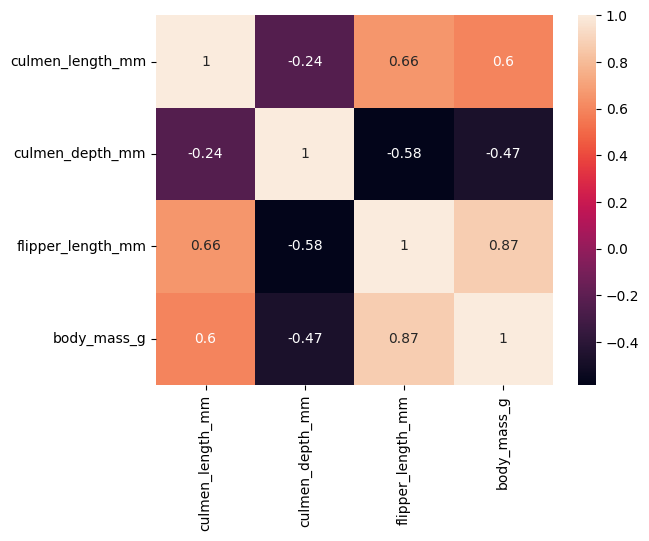

In [319]:
sns.heatmap(data.corr(),annot=True)

In [320]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: >

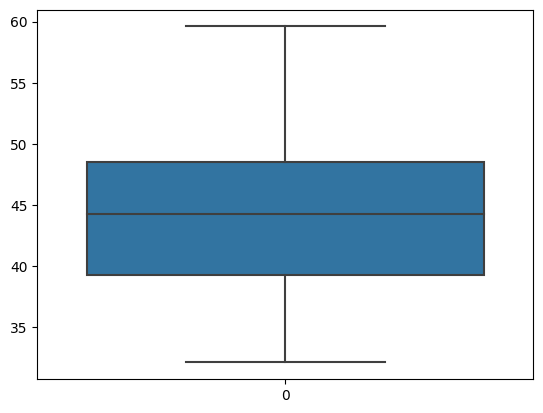

In [321]:
import matplotlib.pyplot as plt
sns.boxplot(data['culmen_length_mm'])


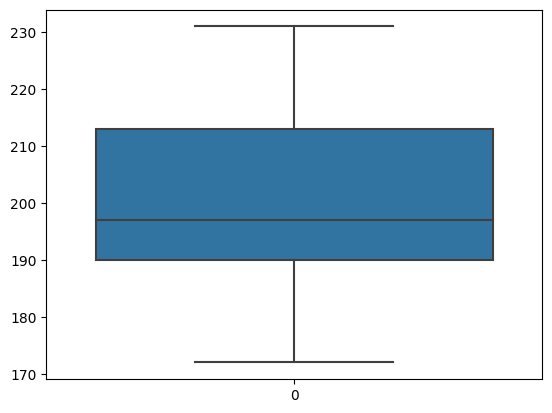

In [322]:
sns.boxplot(data['flipper_length_mm'])
plt.show()

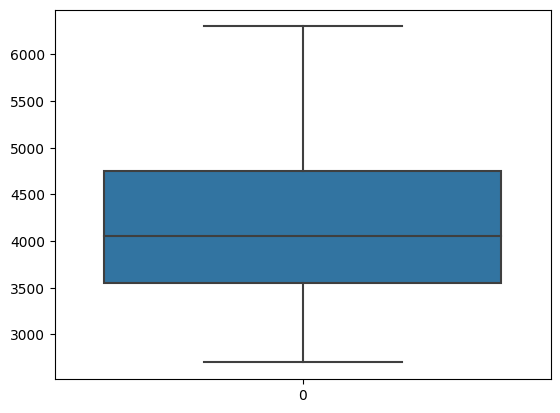

In [323]:
sns.boxplot(data['body_mass_g'])
plt.show()

.Check the correlation of independent variables with the target

In [324]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


<ipython-input-325-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

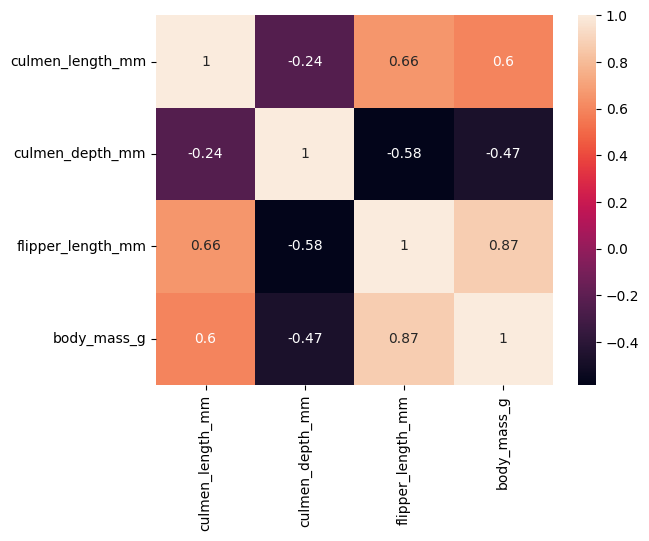

In [325]:
sns.heatmap(data.corr(),annot=True)

In [326]:
data[data.columns[1:]].corr()['body_mass_g'][:]

<ipython-input-326-9bd76bd7d417>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[data.columns[1:]].corr()['body_mass_g'][:]


culmen_length_mm     0.595110
culmen_depth_mm     -0.471916
flipper_length_mm    0.871202
body_mass_g          1.000000
Name: body_mass_g, dtype: float64

In [327]:
 data['island'].unique()
 data['species'].unique()
 data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [328]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [329]:
data['island']=le.fit_transform(data['island'])
data['species']=le.fit_transform(data['species'])
data['sex']=le.fit_transform(data['sex'])

In [330]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


 Scaling the data

In [331]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler
cname=data.columns[:]
data[cname]=scaler().fit_transform(data[cname])
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,0.0,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,0.0,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,0.0,1.0,0.429888,0.482282,0.490088,0.417154,1.0
4,0.0,1.0,0.167273,0.738095,0.355932,0.208333,0.0
...,...,...,...,...,...,...,...
339,1.0,0.0,0.429888,0.482282,0.490088,0.417154,1.0
340,1.0,0.0,0.534545,0.142857,0.728814,0.597222,0.0
341,1.0,0.0,0.665455,0.309524,0.847458,0.847222,1.0
342,1.0,0.0,0.476364,0.202381,0.677966,0.694444,0.0


In [332]:
x=data.drop(['body_mass_g'],axis=1)
x.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,0.0,1.0,0.254545,0.666667,0.152542,1.0
1,0.0,1.0,0.269091,0.511905,0.237288,0.0
2,0.0,1.0,0.298182,0.583333,0.389831,0.0
3,0.0,1.0,0.429888,0.482282,0.490088,1.0
4,0.0,1.0,0.167273,0.738095,0.355932,0.0


In [333]:
y=data['body_mass_g']
y.head()

0    0.291667
1    0.305556
2    0.152778
3    0.417154
4    0.208333
Name: body_mass_g, dtype: float64

In [334]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Now, you have your training and testing data ready to use
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)


X_train:      species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
150      0.0     0.5          0.141818         0.476190           0.254237   
105      0.0     0.0          0.276364         0.690476           0.203390   
112      0.0     0.0          0.276364         0.547619           0.355932   
162      0.5     0.5          0.527273         0.559524           0.355932   
328      1.0     0.0          0.407273         0.107143           0.610169   
..       ...     ...               ...              ...                ...   
203      0.5     0.5          0.701818         0.702381           0.491525   
255      1.0     0.0          0.592727         0.380952           0.813559   
72       0.0     1.0          0.272727         0.488095           0.406780   
235      1.0     0.0          0.625455         0.309524           0.762712   
37       0.0     0.5          0.367273         0.642857           0.135593   

     sex  
150  0.0  
105  1.0  
112  0.0  
162  0.0  

In [335]:
X_train.shape

(275, 6)

In [336]:
X_test.shape

(69, 6)